In [198]:
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Load Data

In [208]:
activities = pd.read_csv('./data/activities.csv')

In [209]:
health = pd.read_csv('./data/health.csv')

In [210]:
home_safety = pd.read_csv('./data/home_safety.csv')

## Count vectorization and stemming/lemmantisation

In [202]:
stopwords = stopwords.words('english')

In [203]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.stem import LancasterStemmer

In [204]:
wn_stemmer = WordNetLemmatizer()
lancaster = LancasterStemmer()

def removal_wornet(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    text = re.sub(r'\d+', '', text)
    words=word_tokenize(text)
    stemmed_words=[wn_stemmer.lemmatize(word=word) for word in words]
    return ' '.join(stemmed_words)

def removal_lancaster(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    text = re.sub(r'\d+', '', text)
    words=word_tokenize(text)
    stemmed_words=[lancaster.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

In [205]:
def bow_lan_vectorization(data):
    vectorizer = CountVectorizer(stop_words = stopwords, 
                                 lowercase = True, 
                                 strip_accents='unicode', 
                                 preprocessor=removal_lancaster)
    data_tokens = vectorizer.fit_transform(data.dropna())
    print(len(vectorizer.vocabulary_),'words in dictionary.')
    return pd.DataFrame(data_tokens.todense(), columns=vectorizer.get_feature_names())


def bow_wn_vectorization(data):
    vectorizer = CountVectorizer(stop_words = stopwords, 
                                 lowercase = True, 
                                 strip_accents='unicode', 
                                 preprocessor=removal_wornet)
    data_tokens = vectorizer.fit_transform(data.dropna())
    print(len(vectorizer.vocabulary_),'words in dictionary.')
    return pd.DataFrame(data_tokens.todense(), columns=vectorizer.get_feature_names())

## Score vectorization

In [206]:
def tfidf_vectorization(df):
    tfidf = TfidfTransformer().fit_transform(df)
    return pd.DataFrame(tfidf.todense(), columns = df.columns)

## Questions

#### 1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

In [207]:
activities

,Unnamed: 0,"Q34_Are you doing other things at home to learn, aside from radio lessons?",Q35_What are you doing?
0,0,Yes,"Harvesting, looking after goats/ sheep and rea..."
1,1,Yes,Family work and reading
2,2,Yes,House work and reading
3,3,Yes,House work and reading
4,4,Yes,Reading
...,...,...,...
4722,4722,NaN,NaN
4723,4723,NaN,NaN
4724,4724,NaN,NaN
4725,4725,NaN,NaN


In [194]:
activities_1 = bow_wn_vectorization(data = activities.iloc[:,-1])

423 words in dictionary.


/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [164]:
activities_1.sum().sort_values(ascending=False)[:25]

read        692
book        344
revis       253
studi       222
note        144
home         96
work         96
previou      74
cook         70
school       66
packag       59
textbook     56
text         55
practic      47
exercis      46
lesson       46
holiday      45
discuss      44
group        41
time         38
self         28
water        27
hous         26
friend       25
play         24
dtype: int64

In [165]:
activities_2 = bow_lan_vectorization(data = activities.iloc[:,-1])

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'aft', 'al', 'ar', 'becaus', 'bef', 'could', 'doe', 'dur', 'furth', 'hav', 'might', 'mor', 'must', 'nee', 'ont', 'oth', 'ourselv', 'ov', 'sam', 'sha', 'som', 'themselv', 'ther', 'thes', 'thi', 'thos', 'und', 'wer', 'wher', 'whil', 'wil', 'wo', 'would', 'yo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


368 words in dictionary.


In [231]:
activities_2.sum().sort_values(ascending=False)[:35]

read        693
book        344
study       222
rev         176
hom          96
work         96
revid        78
prevy        75
cook         70
pract        61
pack         59
textbook     56
school       55
text         55
exerc        46
lesson       46
holiday      45
discuss      44
group        41
tim          38
som          36
us           30
teach        29
self         28
aft          27
wat          27
hous         26
friend       25
wash         24
play         24
harvest      24
look         23
fetch        22
ar           22
hav          21
dtype: int64

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [182]:
lista = [activities_1, activities_2]
title = ['Counter wn','Counter lancaster']

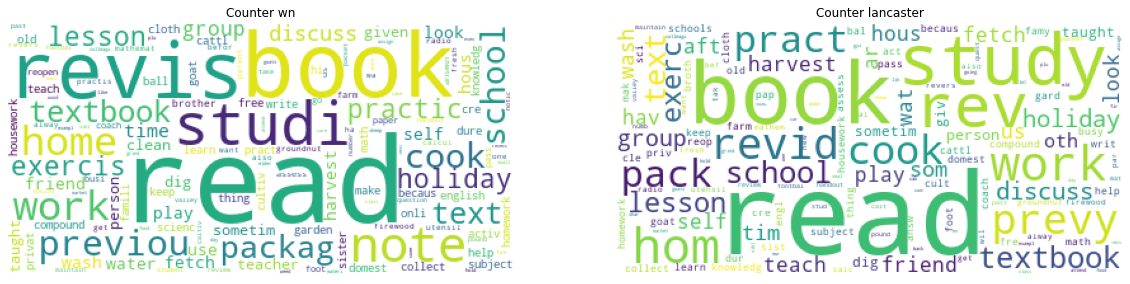

In [183]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

In [184]:
activities_tfidf_1 = tfidf_vectorization(activities_1)
activities_tfidf_2 = tfidf_vectorization(activities_2)

In [185]:
lista = [activities_tfidf_1, activities_tfidf_2]
title = ['Counter wn','Tf-Idf lancaster']

In [186]:
plt.rcParams['figure.figsize'] = [20 , 35]

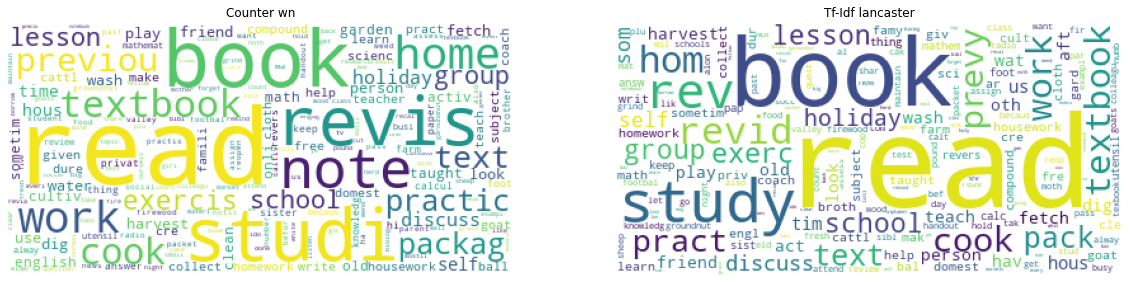

In [187]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

#### 2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [211]:
health_1 = bow_wn_vectorization(data = health.iloc[:,-1])

764 words in dictionary.


/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [212]:
health_1.sum().sort_values(ascending=False)[:25]

home          302
covid         188
safe          162
people        112
disease       108
school         88
corona         87
virus          67
want           56
measure        56
worried        53
stay           51
infection      50
kill           50
staying        47
fear           46
ha             40
dangerous      35
pandemic       35
feel           34
social         32
preventive     31
thing          30
one            29
lot            27
dtype: int64

In [213]:
health_2 = bow_lan_vectorization(data = health.iloc[:,-1])

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'aft', 'al', 'ar', 'becaus', 'bef', 'could', 'doe', 'dur', 'furth', 'hav', 'might', 'mor', 'must', 'nee', 'ont', 'oth', 'ourselv', 'ov', 'sam', 'sha', 'som', 'themselv', 'ther', 'thes', 'thi', 'thos', 'und', 'wer', 'wher', 'whil', 'wil', 'wo', 'would', 'yo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


620 words in dictionary.


In [214]:
health_2.sum().sort_values(ascending=False)[:25]

becaus     675
hom        300
covid      189
saf        188
peopl      112
diseas     108
stay        98
worry       77
infect      75
ar          75
school      67
coron       65
vir         64
kil         58
fear        57
meas        56
want        56
hav         52
ther        50
protect     47
oth         41
prev        40
wil         40
dang        37
feel        37
dtype: int64

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [215]:
lista = [health_1, health_2]
title = ['Counter wn','Counter lancaster']

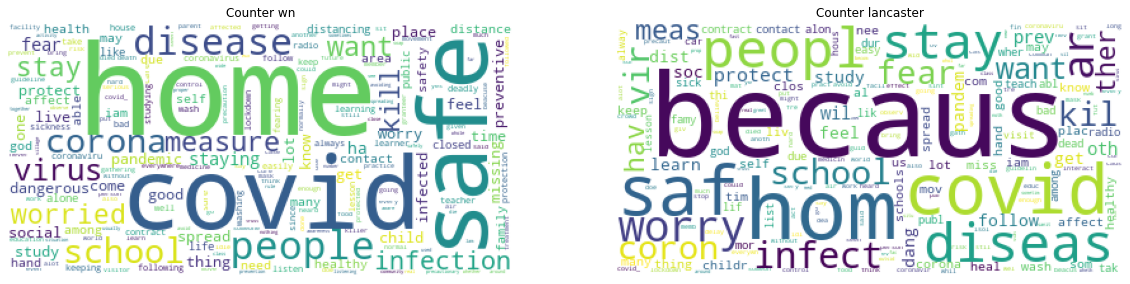

In [216]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

In [217]:
health_tfidf_1 = tfidf_vectorization(health_1)
health_tfidf_2 = tfidf_vectorization(health_2)

In [218]:
lista = [health_tfidf_1, health_tfidf_2]
title = ['Counter wn','Tf-Idf lancaster']

In [219]:
plt.rcParams['figure.figsize'] = [20 , 35]

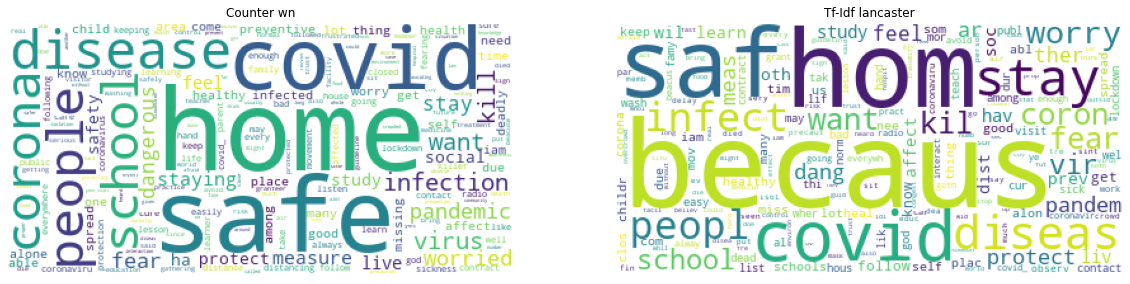

In [220]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

#### 3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [221]:
home_safety_1 = bow_wn_vectorization(data = home_safety.iloc[:,-1])

677 words in dictionary.


/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [222]:
home_safety_1.sum().sort_values(ascending=False)[:25]

home          401
safe          235
people        128
covid         117
disease       102
virus          95
corona         73
measure        70
feel           66
social         63
stay           58
fear           53
hand           45
staying        45
safety         43
distancing     42
place          40
may            40
school         40
come           38
pandemic       35
know           34
kill           29
everywhere     28
follow         27
dtype: int64

In [223]:
home_safety_2 = bow_lan_vectorization(data = home_safety.iloc[:,-1])

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'aft', 'al', 'ar', 'becaus', 'bef', 'could', 'doe', 'dur', 'furth', 'hav', 'might', 'mor', 'must', 'nee', 'ont', 'oth', 'ourselv', 'ov', 'sam', 'sha', 'som', 'themselv', 'ther', 'thes', 'thi', 'thos', 'und', 'wer', 'wher', 'whil', 'wil', 'wo', 'would', 'yo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


564 words in dictionary.


In [224]:
home_safety_2.sum().sort_values(ascending=False)[:25]

becaus    526
hom       400
saf       283
peopl     128
covid     117
stay      103
diseas    102
vir        94
ar         88
meas       70
feel       69
coron      65
dist       64
soc        63
fear       56
oth        55
infect     50
hav        48
com        46
hand       45
wil        42
may        40
plac       40
worry      39
wash       38
dtype: int64

In [225]:
lista = [home_safety_1, home_safety_2]
title = ['Counter wn','Counter lancaster']

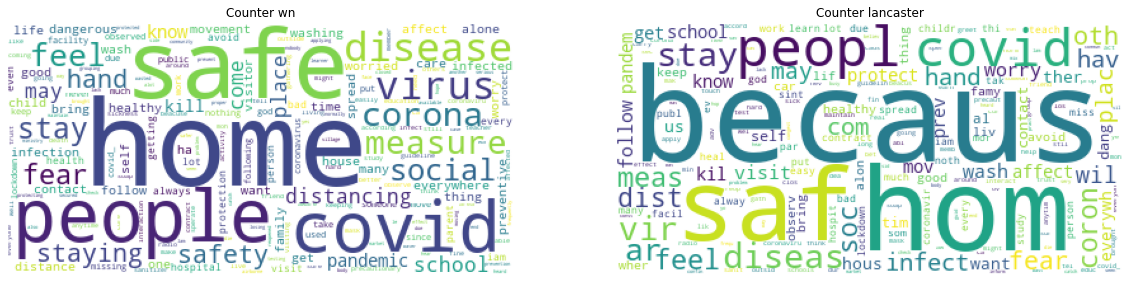

In [226]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

In [227]:
home_safety_tfidf_1 = tfidf_vectorization(home_safety_1)
home_safety_tfidf_2 = tfidf_vectorization(home_safety_2)

In [228]:
lista = [home_safety_tfidf_1, home_safety_tfidf_2]
title = ['Counter wn','Tf-Idf lancaster']

In [229]:
plt.rcParams['figure.figsize'] = [20 , 35]

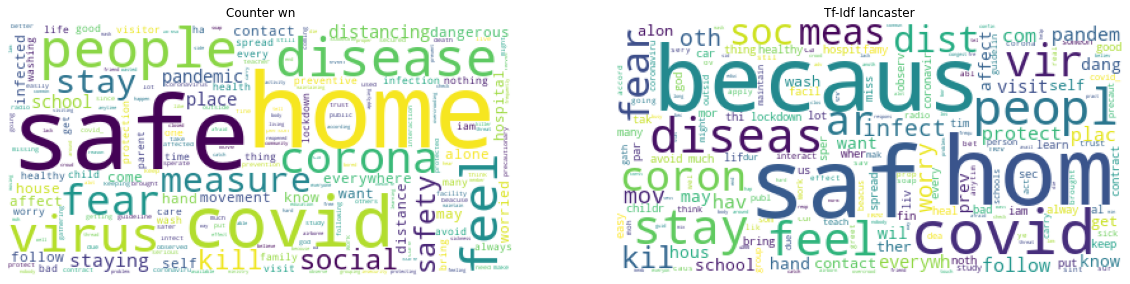

In [230]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()